In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_rows = img_cols = 28
pathToData = 'emnist/'
num_classes = 26

In [3]:
def loadBinData(pathToData, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(pathToData + 'imagesTest.bin', 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype=np.uint8)
    x_test = x_test.reshape(-1, img_rows, img_cols).transpose(0, 2, 1)
    x_test = x_test / 255.0
    return x_test, y_test

In [4]:
x_data, y_data = loadBinData(pathToData, img_rows, img_cols)

Загрузка данных из двоичных файлов...


In [13]:
x_a = x_data[y_data == 1]

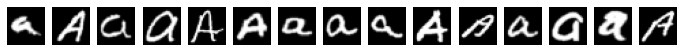

In [23]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    plt.imshow(x_a[i], cmap='gray')
plt.show()

In [59]:
exmpl_small = x_a[7]
exmpl_big = x_a[1]

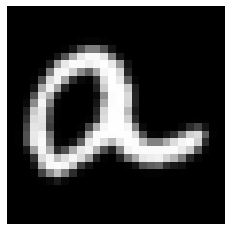

In [60]:
plt.axis('Off')
plt.imshow(exmpl_small, cmap = 'gray')

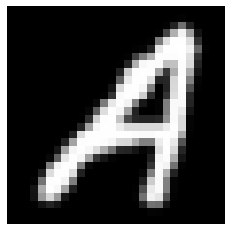

In [61]:
plt.axis('Off')
plt.imshow(exmpl_big, cmap = 'gray')

In [62]:
small = []
big = []

In [50]:
from skimage.metrics import structural_similarity as compare_ssim

In [63]:
for x in x_a:
    sim_big = compare_ssim(x, exmpl_big)
    sim_small = compare_ssim(x, exmpl_small)
    if sim_big < sim_small:
        small.append(x)
    else:
        big.append(x)

In [64]:
len(big)

433

In [65]:
len(small)

367

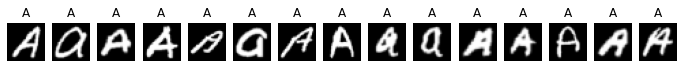

In [66]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title('A')
    plt.imshow(big[i], cmap='gray')
plt.show()

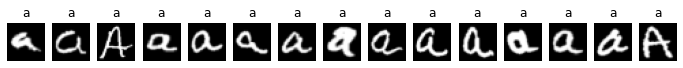

In [67]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title('a')
    plt.imshow(small[i], cmap='gray')
plt.show()

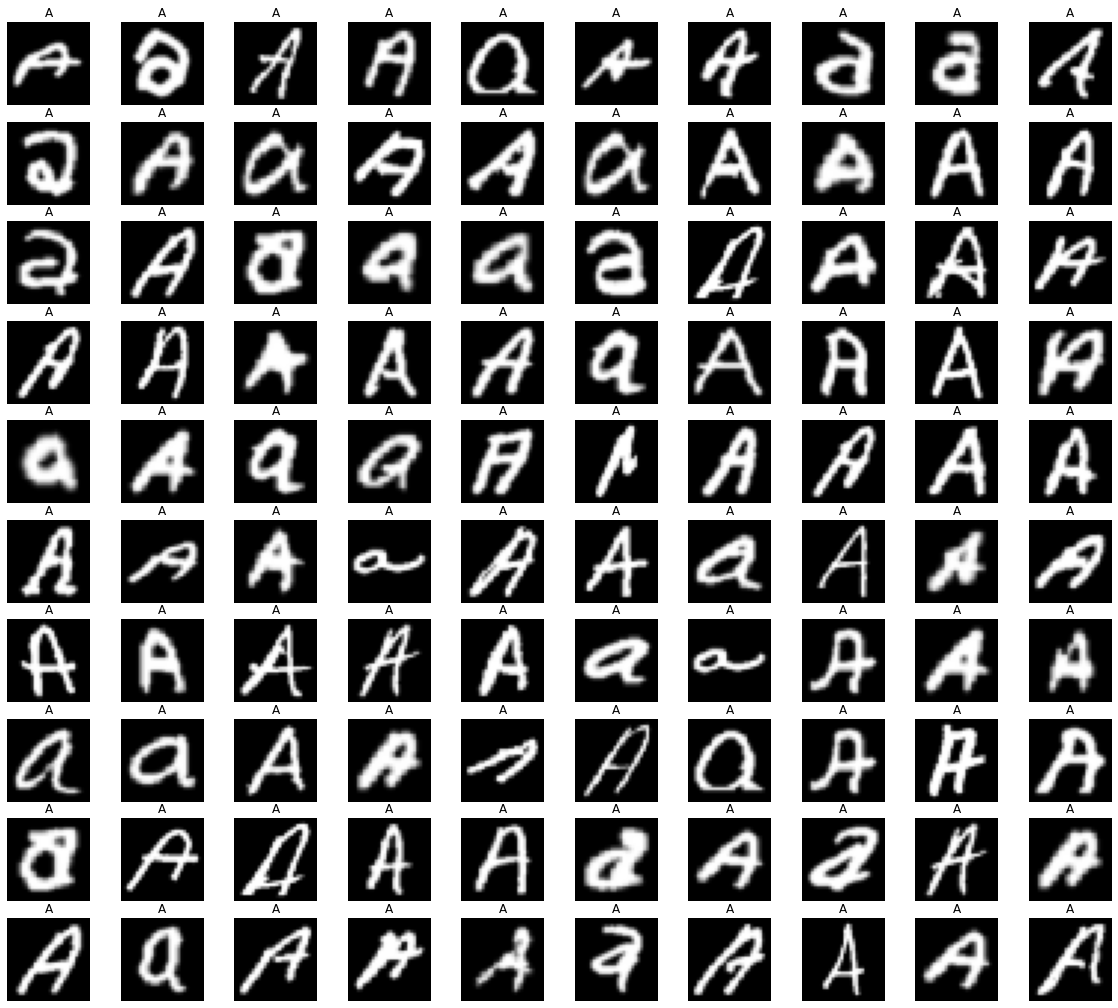

In [74]:
f = plt.figure(figsize=(20, 18))
for i in range(10):
    for j in range(10):
        k = np.random.randint(0, high=len(big), dtype=int)
        sp = f.add_subplot(10, 10, j + 1 + i * 10)
        sp.axis('Off')
        sp.set_title('A')
        plt.imshow(big[k], 'gray')
plt.show()

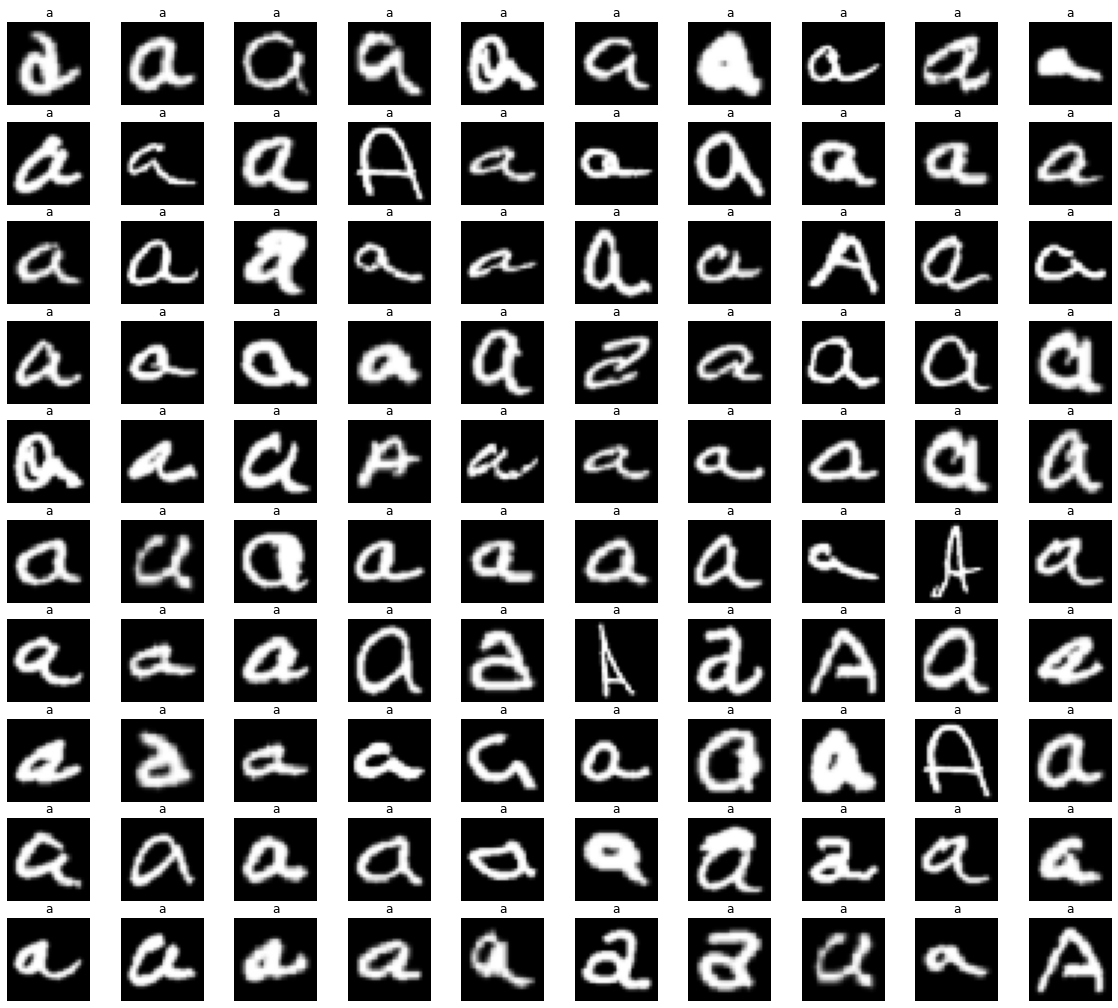

In [76]:
f = plt.figure(figsize=(20, 18))
for i in range(10):
    for j in range(10):
        k = np.random.randint(0, high=len(small), dtype=int)
        sp = f.add_subplot(10, 10, j + 1 + i * 10)
        sp.axis('Off')
        sp.set_title('a')
        plt.imshow(small[k], 'gray')
plt.show()

In [77]:
tosses_big = [66, 62 ,70]
tosses_small = [89, 85, 91]

In [78]:
print("Процент правильных заглавных букв - %3d, процент правильных строчных букв - %3d" % (np.mean(tosses_big), np.mean(tosses_small)))

Процент правильных заглавных букв -  66, процент правильных строчных букв -  88
